# **Classification Tree** 🌳

As we are trying to determine which of the three insturments (Cello, Piano and Violin) produced the sounds in the the audio dataset, this is a classic classification problem, and we can use a Classification Tree.  

---

### Essential Libraries

We will first import the essential Python Libraries.  

> `NumPy` : Library for Numeric Computations in Python  
> `Pandas` : Library for Data Acquisition and Preparation  
> `Seaborn` : Higher-level library for Data Visualization  
> `Matplotlib` : Low-level library for Data Visualization  
> `Librosa` : Library for audio and music analysis, provides tools for music and audio processing, such as loading audio files, extracting features, manipulating audio signals, and more   
> `Librosa.display` : Submodule of Librosa, specifically designed for visualisations related to audio signals. It provides functionality to display waveforms, spectrograms, and other audio-related visualisations that integrate with matplotlib  
> `random` : A Module part of Python's standard utility modules, used to generate random numbers  
> `glob` : A module that finds all the pathnames matching a specified pattern  
> `os` : Module that provides a way of using operating system dependent functionality, like reading or writing to the file system, managing paths, etc

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import librosa
import librosa.display
import glob
import os

### Import the audio data
We will load the data that has already been split into 1 second files. Librosa loads the audio data as a floating point time series. It also returns the sample rate used, which has a default value of 22050. 

In [2]:
cello_audio = []
cello_sr = []
piano_audio = []
piano_sr = []
violin_audio = []
violin_sr = []

for wav_file in glob.glob(os.path.join('split/Cello', '*.wav')):
    audio, sr = librosa.load(wav_file)
    cello_audio.append(audio)
    cello_sr.append(sr)

for wav_file in glob.glob(os.path.join('split/Piano', '*.wav')):
    audio, sr = librosa.load(wav_file)
    piano_audio.append(audio)
    piano_sr.append(sr)

for wav_file in glob.glob(os.path.join('split/Violin', '*.wav')):
    audio, sr = librosa.load(wav_file)
    violin_audio.append(audio)
    violin_sr.append(sr)

### Extract features

From our exploratory data analysis, we found that the audio's Mel-frequency Cepstral Coefficient (MFCC), Spectral Centroid, Spectral Rolloff and Zero-Crossing Rate seem to have a relationship with its instrument type, and can thus be used to predict the instrument.  

Hence, we obtain these features for all data files of each instrument and store each characteristic in a pandas DataFrame.

In [3]:
cello_mfccs_mean = np.zeros(1597)
cello_spectral_centroids_mean = np.zeros(1597)
cello_spectral_rolloff_mean = np.zeros(1597)
cello_zero_crossing_rate_mean = np.zeros(1597)
piano_mfccs_mean = np.zeros(1597)
piano_spectral_centroids_mean = np.zeros(1597)
piano_spectral_rolloff_mean = np.zeros(1597)
piano_zero_crossing_rate_mean = np.zeros(1597)
violin_mfccs_mean = np.zeros(1597)
violin_spectral_centroids_mean = np.zeros(1597)
violin_spectral_rolloff_mean = np.zeros(1597)
violin_zero_crossing_rate_mean = np.zeros(1597)

for i in range(1597):
    mfccs = librosa.feature.mfcc(y=cello_audio[i], sr=cello_sr[i])
    spectral_centroids = librosa.feature.spectral_centroid(y=cello_audio[i], sr=cello_sr[i])
    rolloff = librosa.feature.spectral_rolloff(y=cello_audio[i], sr=cello_sr[i], roll_percent=0.85)[0]
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=cello_audio[i])
    # add the mean of the features to the array
    cello_mfccs_mean[i] = mfccs.mean(axis=1).mean()
    cello_spectral_centroids_mean[i] = spectral_centroids.mean(axis=1)[0]
    cello_spectral_rolloff_mean[i] = rolloff.mean()
    cello_zero_crossing_rate_mean[i] = zero_crossing_rate.mean(axis=1)[0]

for i in range(1597):
    mfccs = librosa.feature.mfcc(y=piano_audio[i], sr=piano_sr[i])
    spectral_centroids = librosa.feature.spectral_centroid(y=piano_audio[i], sr=piano_sr[i])
    rolloff = librosa.feature.spectral_rolloff(y=piano_audio[i], sr=piano_sr[i], roll_percent=0.85)[0]
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=piano_audio[i])
    # add the mean of the features to the array
    piano_mfccs_mean[i] = mfccs.mean(axis=1).mean()
    piano_spectral_centroids_mean[i] = spectral_centroids.mean(axis=1)[0]
    piano_spectral_rolloff_mean[i] = rolloff.mean()
    piano_zero_crossing_rate_mean[i] = zero_crossing_rate.mean(axis=1)[0]

for i in range(1597):
    mfccs = librosa.feature.mfcc(y=violin_audio[i], sr=violin_sr[i])
    spectral_centroids = librosa.feature.spectral_centroid(y=violin_audio[i], sr=violin_sr[i])
    rolloff = librosa.feature.spectral_rolloff(y=violin_audio[i], sr=violin_sr[i], roll_percent=0.85)[0]
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=violin_audio[i])
    # add the mean of the features to the array
    violin_mfccs_mean[i] = mfccs.mean(axis=1).mean()
    violin_spectral_centroids_mean[i] = spectral_centroids.mean(axis=1)[0]
    violin_spectral_rolloff_mean[i] = rolloff.mean()
    violin_zero_crossing_rate_mean[i] = zero_crossing_rate.mean(axis=1)[0]

# combine arrays
all_mfccs_mean = pd.DataFrame()
all_mfccs_mean['cello'] = pd.Series(cello_mfccs_mean)
all_mfccs_mean['piano'] = pd.Series(piano_mfccs_mean)
all_mfccs_mean['violin'] = pd.Series(violin_mfccs_mean)
all_mfccs_mean = all_mfccs_mean.melt(var_name='instru', value_name='mfcc')


all_spectral_centroids_mean = pd.DataFrame()
all_spectral_centroids_mean['cello'] = pd.Series(cello_spectral_centroids_mean)
all_spectral_centroids_mean['piano'] = pd.Series(piano_spectral_centroids_mean)
all_spectral_centroids_mean['violin'] = pd.Series(violin_spectral_centroids_mean)
all_spectral_centroids_mean = all_spectral_centroids_mean.melt(var_name='instru', value_name='sc')


all_spectral_rolloff_mean = pd.DataFrame()
all_spectral_rolloff_mean['cello'] = pd.Series(cello_spectral_rolloff_mean)
all_spectral_rolloff_mean['piano'] = pd.Series(piano_spectral_rolloff_mean)
all_spectral_rolloff_mean['violin'] = pd.Series(violin_spectral_rolloff_mean)
all_spectral_rolloff_mean = all_spectral_rolloff_mean.melt(var_name='instru', value_name='sro')


all_zero_crossing_rate_mean = pd.DataFrame()
all_zero_crossing_rate_mean['cello'] = pd.Series(cello_zero_crossing_rate_mean)
all_zero_crossing_rate_mean['piano'] = pd.Series(piano_zero_crossing_rate_mean)
all_zero_crossing_rate_mean['violin'] = pd.Series(violin_zero_crossing_rate_mean)
all_zero_crossing_rate_mean = all_zero_crossing_rate_mean.melt(var_name='instru', value_name='zcr')

---
## Strip-plot
To visualise potential partitions in the data for the classification tree, we plot these features on strip-plots.

<Axes: xlabel='zcr', ylabel='instru'>

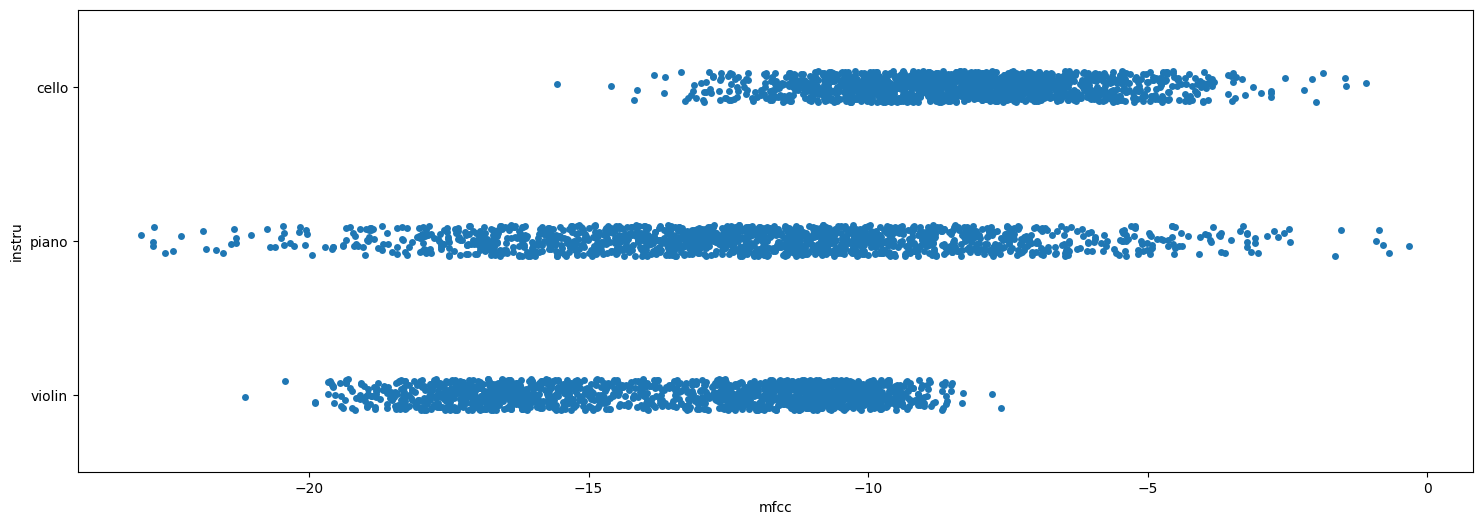

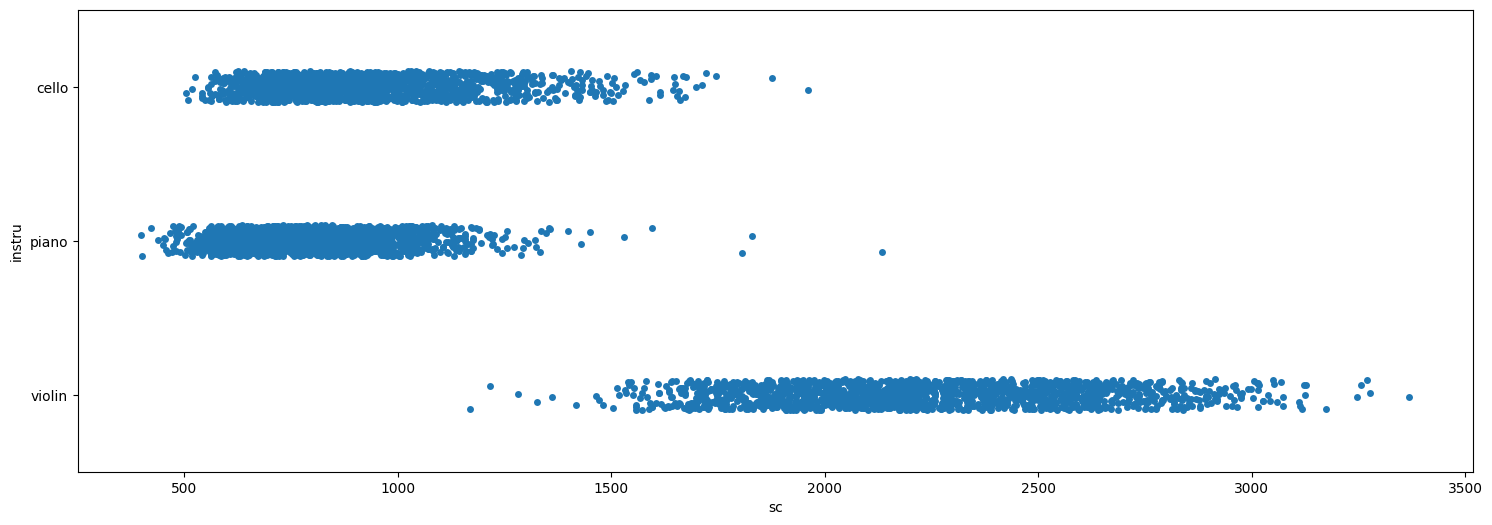

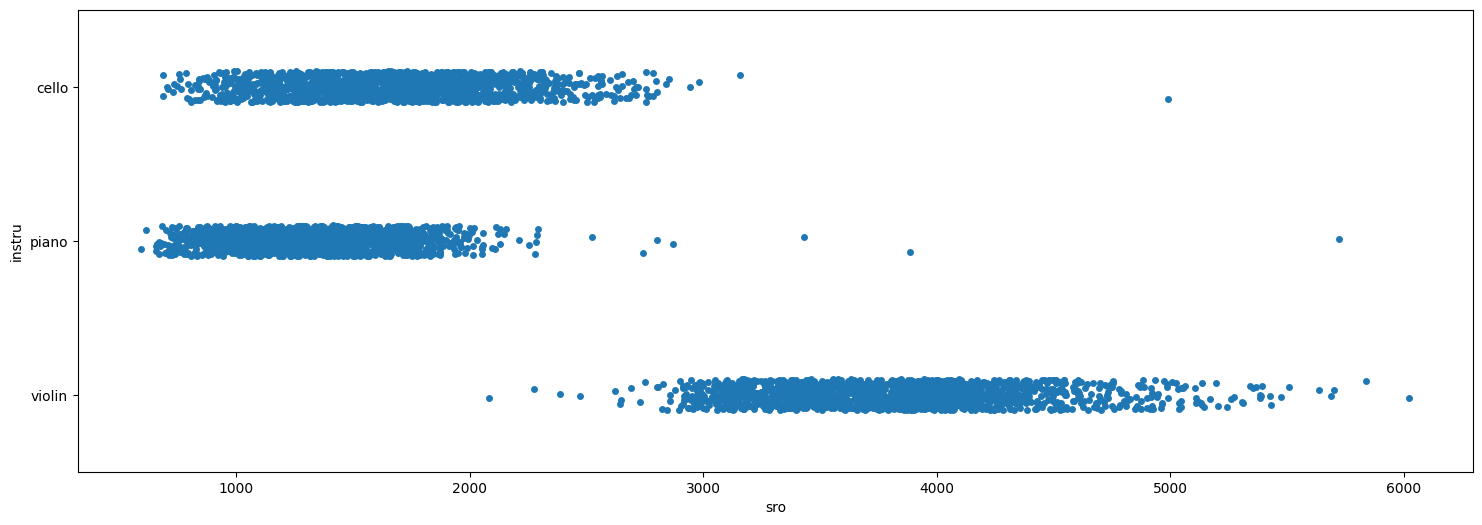

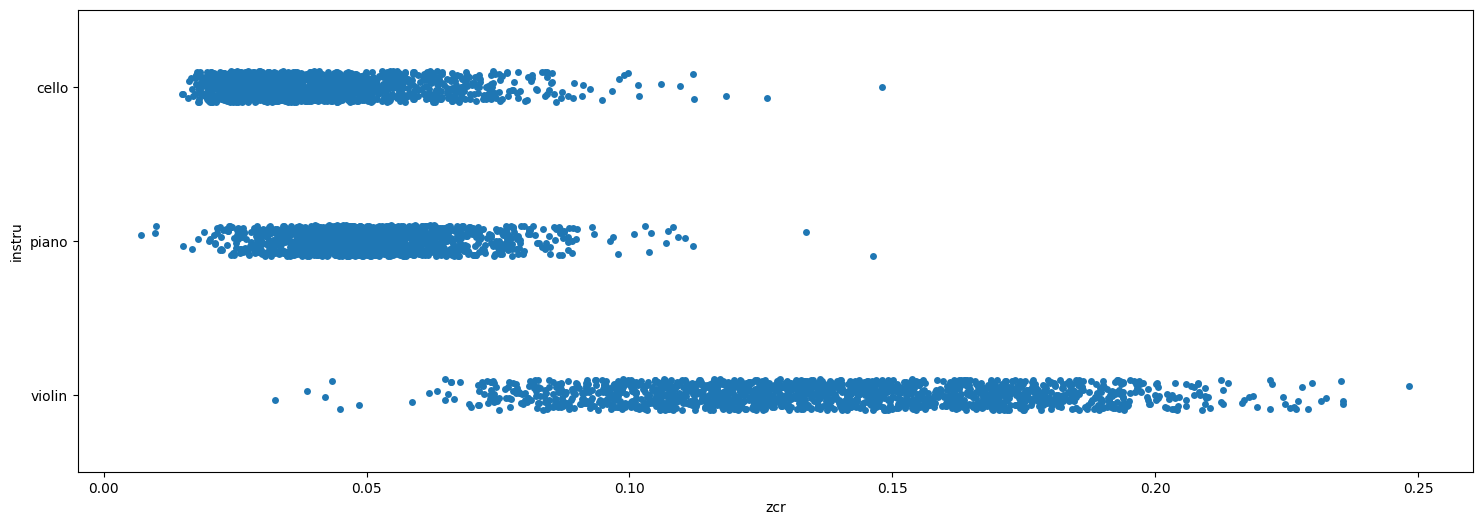

In [4]:
f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "mfcc", y = "instru", data = all_mfccs_mean, orient = "h")

f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "sc", y = "instru", data = all_spectral_centroids_mean, orient = "h")

f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "sro", y = "instru", data = all_spectral_rolloff_mean, orient = "h")

f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "zcr", y = "instru", data = all_zero_crossing_rate_mean, orient = "h")

---
## Classification Tree

### Reorganise data
To build the classification tree, we need to reorganise the feature data and create a DataFrame with each audio file's features and its corresponding instrument

In [5]:
celloDF = pd.DataFrame()
celloDF['mfcc'] = pd.Series(cello_mfccs_mean)
celloDF['sc'] = pd.Series(cello_spectral_centroids_mean)
celloDF['sro'] = pd.Series(cello_spectral_rolloff_mean)
celloDF['zcr'] = pd.Series(cello_zero_crossing_rate_mean)
celloDF['instru'] = 'cello'

pianoDF = pd.DataFrame()
pianoDF['mfcc'] = pd.Series(piano_mfccs_mean)
pianoDF['sc'] = pd.Series(piano_spectral_centroids_mean)
pianoDF['sro'] = pd.Series(piano_spectral_rolloff_mean)
pianoDF['zcr'] = pd.Series(piano_zero_crossing_rate_mean)
pianoDF['instru'] = 'piano'

violinDF = pd.DataFrame()
violinDF['mfcc'] = pd.Series(violin_mfccs_mean)
violinDF['sc'] = pd.Series(violin_spectral_centroids_mean)
violinDF['sro'] = pd.Series(violin_spectral_rolloff_mean)
violinDF['zcr'] = pd.Series(violin_zero_crossing_rate_mean)
violinDF['instru'] = 'violin'

combinedDF = pd.concat([celloDF, pianoDF, violinDF], ignore_index=True)

Then, we extract the features and labels.

In [6]:
y = pd.DataFrame(combinedDF["instru"])
X = pd.DataFrame(combinedDF[["mfcc", "sc", "sro", "zcr"]])

### More Essential Libraries

We will need to import a few more Python Libraries.  

> `Scikit-learn` : Machine learning library that provides tools for predictive data analysis

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

### Shuffle data
As the data is currently sorted by instrument, we will shuffle the data to randomise the order in which the data is presented to the tree when it is trained. This will prevent overfitting and help it to generalise better.

In [8]:
print(y)
print(X)

      instru
0      cello
1      cello
2      cello
3      cello
4      cello
...      ...
4786  violin
4787  violin
4788  violin
4789  violin
4790  violin

[4791 rows x 1 columns]
           mfcc           sc          sro       zcr
0     -7.369007   624.297955  1017.688543  0.023981
1     -9.537647   737.717676  1256.021950  0.025746
2     -7.799830   999.596445  1814.661754  0.046242
3     -6.354743   954.791508  1717.517645  0.048362
4     -7.125197  1089.281115  2012.865101  0.056197
...         ...          ...          ...       ...
4786 -16.951046  2339.886753  4298.076283  0.124490
4787 -17.281971  2073.687473  3907.542281  0.119229
4788 -16.112957  3013.945880  5638.028786  0.187356
4789 -15.996839  2751.623362  5034.854403  0.144775
4790 -16.657476  2092.965285  3857.869096  0.110629

[4791 rows x 4 columns]


In [9]:
y, X = shuffle(y, X)
y, X = shuffle(y, X)
print(y)
print(X)

      instru
559    cello
2911   piano
3411  violin
4004  violin
4157  violin
...      ...
3086   piano
2196   piano
3544  violin
1800   piano
3814  violin

[4791 rows x 1 columns]
           mfcc           sc          sro       zcr
559  -12.814178  1027.979047  1766.946134  0.046609
2911  -8.858969   710.321703  1288.321755  0.042736
3411 -14.565184  2171.748470  3605.098655  0.121016
4004 -10.083364  2131.004885  3636.419678  0.112205
4157  -9.764083  1764.390670  3233.650901  0.084073
...         ...          ...          ...       ...
3086 -14.778381   809.390552  1367.358398  0.046675
2196 -16.165592   795.592868  1113.364480  0.059248
3544 -14.321571  2278.809850  3697.348855  0.149126
1800 -16.989807   610.835164   781.557395  0.045011
3814 -12.047335  2506.450321  4197.506436  0.152444

[4791 rows x 4 columns]


---
### Train Classification Tree
We will now train the classification trees, using max_depth = 2, 3, 4. The classification accuracy of the trees will then be assesed and the confusion matrix will be plotted. The tree itself will also be plotted to visualise the binary decisions made.

**max_depth = 2:**

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8313387141664348

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8397328881469115



<Axes: >

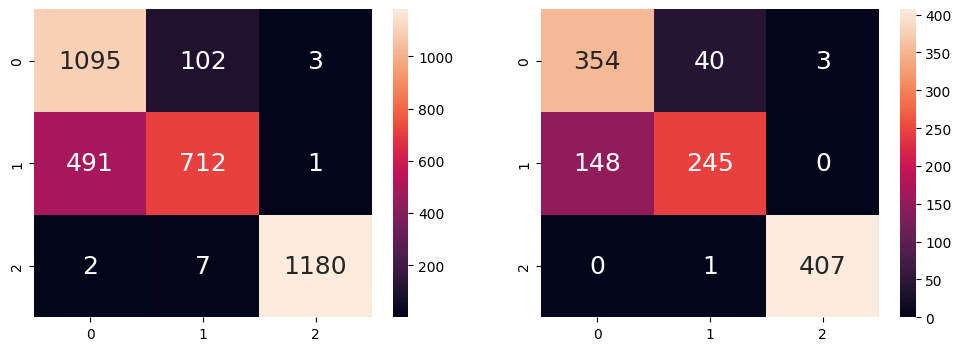

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree2 = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree2.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree2.predict(X_train)
y_test_pred = dectree2.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5, 0.8333333333333334, 'sro <= 2799.561\ngini = 0.667\nsamples = 3593\nvalue = [1200, 1204, 1189]\nclass = Piano'),
 Text(0.25, 0.5, 'mfcc <= -11.061\ngini = 0.504\nsamples = 2404\nvalue = [1196, 1199, 9]\nclass = Piano'),
 Text(0.125, 0.16666666666666666, 'gini = 0.232\nsamples = 816\nvalue = [101.0, 708.0, 7.0]\nclass = Piano'),
 Text(0.375, 0.16666666666666666, 'gini = 0.429\nsamples = 1588\nvalue = [1095.0, 491.0, 2.0]\nclass = Cello'),
 Text(0.75, 0.5, 'zcr <= 0.054\ngini = 0.015\nsamples = 1189\nvalue = [4, 5, 1180]\nclass = Violin'),
 Text(0.625, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [1, 4, 0]\nclass = Piano'),
 Text(0.875, 0.16666666666666666, 'gini = 0.007\nsamples = 1184\nvalue = [3, 1, 1180]\nclass = Violin')]

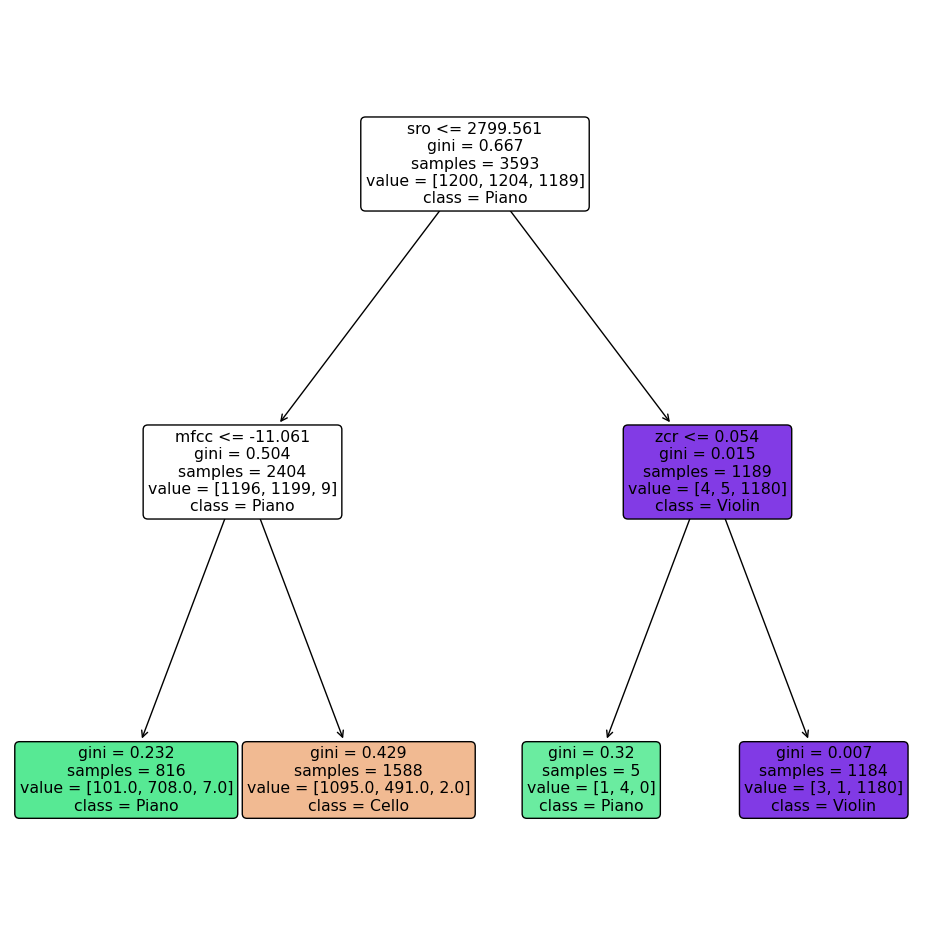

In [11]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Cello","Piano","Violin"])

**max_depth = 3:**

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8627887559142777

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8580968280467446



<Axes: >

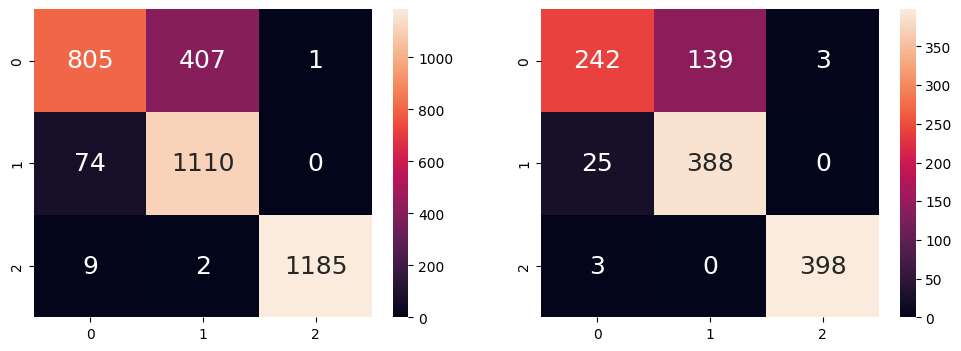

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree3 = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree3.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree3.predict(X_train)
y_test_pred = dectree3.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5, 0.875, 'sro <= 2801.763\ngini = 0.667\nsamples = 3593\nvalue = [1213, 1184, 1196]\nclass = Cello'),
 Text(0.25, 0.625, 'mfcc <= -11.048\ngini = 0.504\nsamples = 2399\nvalue = [1210, 1180, 9]\nclass = Cello'),
 Text(0.125, 0.375, 'sro <= 1762.909\ngini = 0.229\nsamples = 818\nvalue = [100, 711, 7]\nclass = Piano'),
 Text(0.0625, 0.125, 'gini = 0.078\nsamples = 713\nvalue = [29, 684, 0]\nclass = Piano'),
 Text(0.1875, 0.125, 'gini = 0.472\nsamples = 105\nvalue = [71.0, 27.0, 7.0]\nclass = Cello'),
 Text(0.375, 0.375, 'zcr <= 0.04\ngini = 0.419\nsamples = 1581\nvalue = [1110, 469, 2]\nclass = Cello'),
 Text(0.3125, 0.125, 'gini = 0.113\nsamples = 779\nvalue = [732, 47, 0]\nclass = Cello'),
 Text(0.4375, 0.125, 'gini = 0.501\nsamples = 802\nvalue = [378, 422, 2]\nclass = Piano'),
 Text(0.75, 0.625, 'zcr <= 0.064\ngini = 0.012\nsamples = 1194\nvalue = [3, 4, 1187]\nclass = Violin'),
 Text(0.625, 0.375, 'mfcc <= -15.551\ngini = 0.5\nsamples = 6\nvalue = [1, 4, 1]\nclass = Piano'),

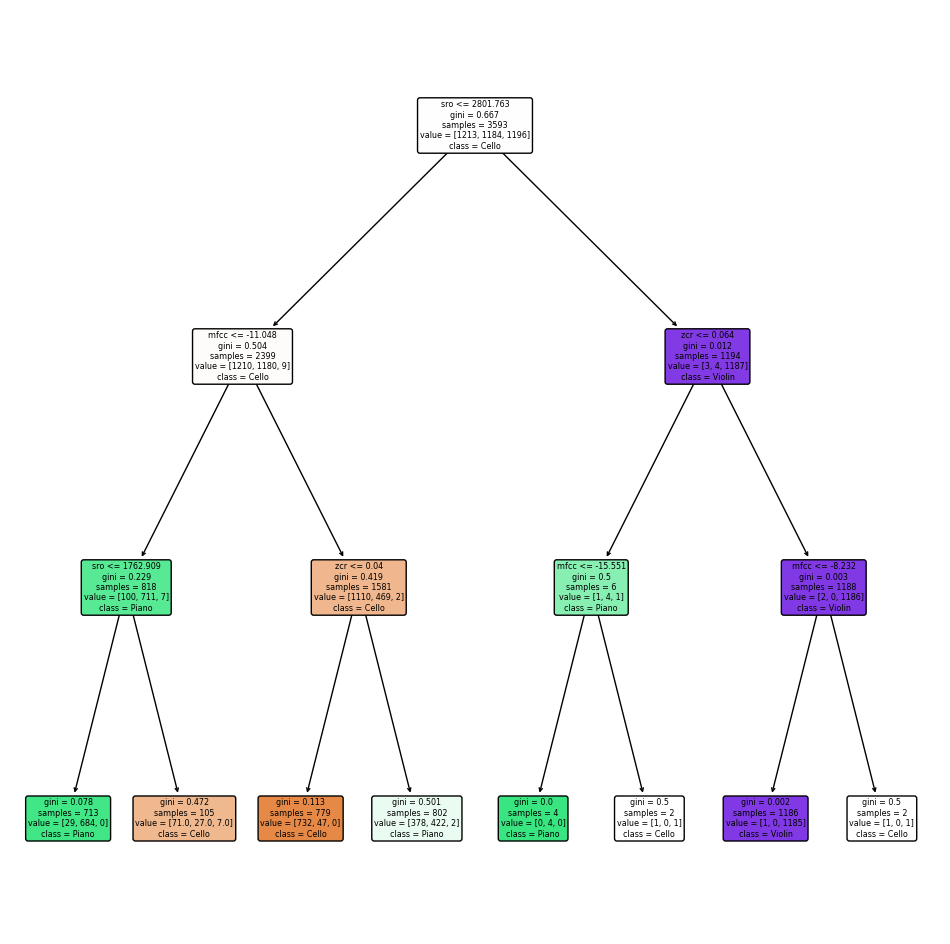

In [13]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Cello","Piano","Violin"])

**max_depth = 4:**

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9242972446423602

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9407345575959933



<Axes: >

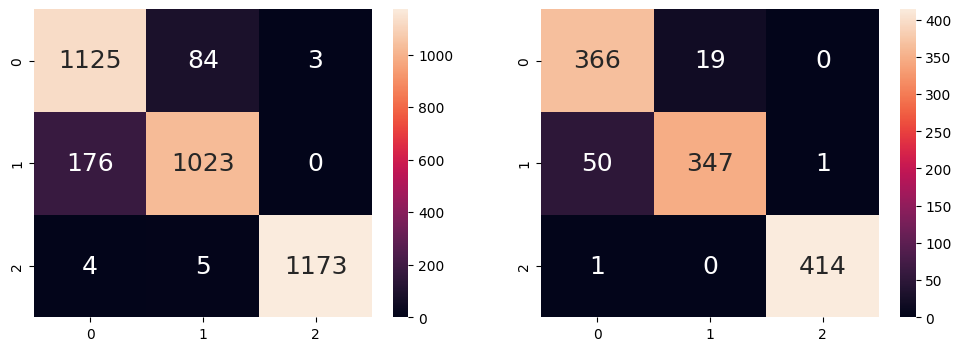

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5089285714285714, 0.9, 'sro <= 2799.561\ngini = 0.667\nsamples = 3593\nvalue = [1215, 1184, 1194]\nclass = Cello'),
 Text(0.2857142857142857, 0.7, 'mfcc <= -11.048\ngini = 0.503\nsamples = 2400\nvalue = [1213, 1180, 7]\nclass = Cello'),
 Text(0.14285714285714285, 0.5, 'sro <= 1702.224\ngini = 0.234\nsamples = 821\nvalue = [104.0, 711.0, 6.0]\nclass = Piano'),
 Text(0.07142857142857142, 0.3, 'mfcc <= -11.721\ngini = 0.087\nsamples = 705\nvalue = [32, 673, 0]\nclass = Piano'),
 Text(0.03571428571428571, 0.1, 'gini = 0.036\nsamples = 600\nvalue = [11, 589, 0]\nclass = Piano'),
 Text(0.10714285714285714, 0.1, 'gini = 0.32\nsamples = 105\nvalue = [21, 84, 0]\nclass = Piano'),
 Text(0.21428571428571427, 0.3, 'mfcc <= -14.26\ngini = 0.505\nsamples = 116\nvalue = [72, 38, 6]\nclass = Cello'),
 Text(0.17857142857142858, 0.1, 'gini = 0.405\nsamples = 20\nvalue = [2, 15, 3]\nclass = Piano'),
 Text(0.25, 0.1, 'gini = 0.41\nsamples = 96\nvalue = [70, 23, 3]\nclass = Cello'),
 Text(0.4285714

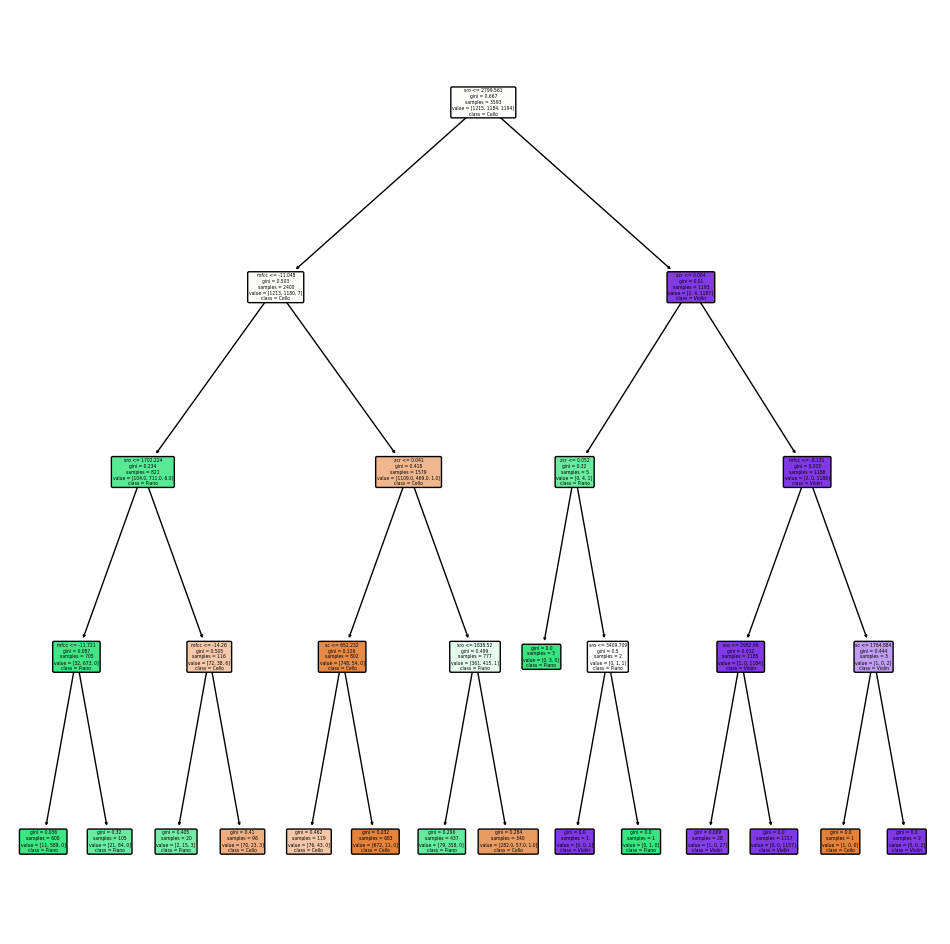

In [15]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Cello","Piano","Violin"])